# FIT5196 - Assignment 03 - Exploratory Data Analysis and Data Cleansing

## Group 025

### Group member 1: Raguram Ramakrishnasamy Dhandapani , Student Number: 30151325
### Group member 2: Thirugnanam Ramanathan, Student Number: 30404975

#### Date: 07-10-2019

#### Version: 3.0
Environment: Python 3 and Jupyter Notebook



## 1. Introduction

The Assignment has 3 input files and 3 support files.
   - The input files are : <br /> 
       - **dirtydata.csv** <br /> 
            The dirty data has errors in any one column of most of the rows and those anomalies in all coloumns has to be rectified in the output file.The different anomalies on each column is detected and analysed and possible method to imput or correct them is executed in the final file.
       - **missingdata.csv** <br /> 
           The missing data has few of the rows with empty value in the some columns. Those values should be imputed using different techniques and the output file should be complete file with missing values imputed.
       - **outlier.csv** <br />
           The outlier value in the delivery fee column has to be detected and removed in the output file.
   - The support files are : <br />
       - **branches.csv** <br />
           This file has the details of the branch like branch code, branch name and latitude and longitude of each brach in it.
       - **nodes.csv** <br />
           The map is plotted with the nodes and this file has the node ID and latitude and logitude of each node.
       - **edges.csv** <br /> 
           The distance between two nodes and the type of street is obtained from this file.


### Libraries Used: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import networkx as nx

In [2]:
#Importing branch data for each node and branch
branch_data = pd.read_csv('branches.csv')
nodes_data = pd.read_csv('nodes.csv')
edges_data = pd.read_csv('edges.csv')

### 2.MISSING Data Analysis

In [3]:
#imput file is read to dataframe
missing_data = pd.read_csv('Group025_missing_data.csv')
missing_data.head()

order_id        date      time order_type branch_code  \
0  ORDI06798  2018-05-09  12:13:31      Lunch          NS   
1  ORDA10063  2018-04-05  11:02:32  Breakfast          BK   
2  ORDJ02300  2018-08-18  15:36:20      Lunch          TP   
3  ORDA02021  2018-11-19  18:38:52     Dinner          BK   
4  ORDK02285  2018-07-29  14:55:46      Lunch          BK   

                                         order_items  order_price  \
0  [('Fries', 10), ('Steak', 4), ('Salad', 4), ('...        748.8   
1     [('Coffee', 1), ('Cereal', 3), ('Pancake', 6)]        216.0   
2  [('Chicken', 3), ('Salad', 4), ('Steak', 8), (...        701.8   
3                [('Salmon', 2), ('Fish&Chips', 10)]        432.0   
4  [('Burger', 6), ('Chicken', 7), ('Salad', 2), ...        564.4   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.799357    144.964094                    0                    6.806   
1    -37.817905    144.951423                    0                    8.887   
2    -37.803713    144.963473                    0                    9.334   
3    -37.817889    145.008641                    0                    3.998   
4    -37.815178    144.945054                    0                    9.164   

   delivery_fee  
0     12.435106  
1     14.110451  
2     14.276365  
3     11.173037  
4     17.836822

#### Identifying the missing values in different columns in the missing data file

In [4]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


#### NULL Values
<p> There are missing values only in three columns - Branch Code, distance_to_customer_KM, delivery_fee </p>


#### Finding branch and distance
<p> Focusing on finding the branch based on the distance between the customer and Branch, so that we will be able to find the branch and distance for an order where both are missing and then we can find the missing distances as well</p>

In [5]:
#Merging the Braches and nodes data to find the customer and branch node ids
new_df = pd.merge(missing_data,branch_data,how='left')

cust_node_added_m = pd.merge(new_df,nodes_data,how='left',left_on=['customer_lat','customer_lon'],right_on=['lat','lon'])
cust_node_added_m = cust_node_added_m.drop(columns=['lat','lon']).rename(columns={'node':'customer_node'})

branch_code_added_m = pd.merge(cust_node_added_m,nodes_data,how='left',left_on=['branch_lat','branch_lon'],right_on=['lat','lon'])
branch_code_added_m = branch_code_added_m.drop(columns=['lat','lon']).rename(columns={'node':'branch_node'})
branch_code_added_m.head()

order_id        date      time order_type branch_code  \
0  ORDI06798  2018-05-09  12:13:31      Lunch          NS   
1  ORDA10063  2018-04-05  11:02:32  Breakfast          BK   
2  ORDJ02300  2018-08-18  15:36:20      Lunch          TP   
3  ORDA02021  2018-11-19  18:38:52     Dinner          BK   
4  ORDK02285  2018-07-29  14:55:46      Lunch          BK   

                                         order_items  order_price  \
0  [('Fries', 10), ('Steak', 4), ('Salad', 4), ('...        748.8   
1     [('Coffee', 1), ('Cereal', 3), ('Pancake', 6)]        216.0   
2  [('Chicken', 3), ('Salad', 4), ('Steak', 8), (...        701.8   
3                [('Salmon', 2), ('Fish&Chips', 10)]        432.0   
4  [('Burger', 6), ('Chicken', 7), ('Salad', 2), ...        564.4   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.799357    144.964094                    0                    6.806   
1    -37.817905    144.951423                    0                    8.887   
2    -37.803713    144.963473                    0                    9.334   
3    -37.817889    145.008641                    0                    3.998   
4    -37.815178    144.945054                    0                    9.164   

   delivery_fee branch_name  branch_lat  branch_lon  customer_node  \
0     12.435106   Nickolson  -37.773803  144.983647     1492169281   
1     14.110451      Bakers  -37.815834  145.046450     2442297405   
2     14.276365    Thompson  -37.861835  144.905716     2992062894   
3     11.173037      Bakers  -37.815834  145.046450     1458422313   
4     17.836822      Bakers  -37.815834  145.046450     1132014804   

    branch_node  
0  2.455255e+09  
1  1.889485e+09  
2  1.390575e+09  
3  1.889485e+09  
4  1.889485e+09

In [6]:
branch_node = pd.merge(branch_data,nodes_data,how='left',left_on=['branch_lat','branch_lon'],right_on=['lat','lon']).drop(columns=['lat','lon']).rename(columns={'node':'branch_node'})
# extracting the unique branches and its location details
branch = branch_node['branch_code'].unique()
branch_node.head()

branch_code branch_name  branch_lat  branch_lon  branch_node
0          NS   Nickolson  -37.773803  144.983647   2455254505
1          TP    Thompson  -37.861835  144.905716   1390575046
2          BK      Bakers  -37.815834  145.046450   1889485053

#### Setting up the branches for all the NaN values

It is obtained that, there are only three distinct branches available from the data provided. So for imputing for branch codes for the rows missing with branch codes, we are extracting the unique codes with respect to branch ID from the Order_ID.

In [7]:
bk_orders=[]
tp_orders=[]
ns_orders=[]
# Order id's of each branch is seperated and stored in a list.
for index, row in branch_code_added_m.iterrows():
    if row['branch_code']=='BK':
        bk_orders.append(row['order_id'])
    elif row['branch_code']=='TP':
        tp_orders.append(row['order_id'])
    elif row['branch_code']=='NS':
        ns_orders.append(row['order_id'])

# extracting the unique code from the order ID in each branch list.
id_bk = []
id_tp = []
id_ns = []
for item in bk_orders:
    id_bk.append(re.sub('\d*','',re.sub('ORD','',item)))

for item in tp_orders:
    id_tp.append(re.sub('\d*','',re.sub('ORD','',item)))

for item in ns_orders:
    id_ns.append(re.sub('\d*','',re.sub('ORD','',item)))

#Unique code corresponding to the branch ID from the order ID's are extracted.
print('The ORDER ID tags for Branch BK')
print(set(id_bk))
print('The ORDER ID tags for Branch TP')
print(set(id_tp))
print('The ORDER ID tags for Branch NS')
print(set(id_ns))


The ORDER ID tags for Branch BK
{'X', 'A', 'K'}
The ORDER ID tags for Branch TP
{'B', 'J', 'Y'}
The ORDER ID tags for Branch NS
{'Z', 'C', 'I'}


#### Imputing the missing values of Branch ID using the Unique code in Order ID.

In [8]:
##Fixing the branch codes based on order IDs
for index, row in branch_code_added_m.iterrows():
    
    if str(row['branch_code']).lower()=='nan':
        if re.sub('\d*','',re.sub('ORD','',row['order_id'])) in id_bk:
            branch_code_added_m.set_value(index,'branch_code','BK')
        elif re.sub('\d*','',re.sub('ORD','',row['order_id'])) in id_ns:
            branch_code_added_m.set_value(index,'branch_code','NS')
        elif re.sub('\d*','',re.sub('ORD','',row['order_id'])) in id_tp:
            branch_code_added_m.set_value(index,'branch_code','TP')
# after imputing the branch code for the missing values.
branch_code_added_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 17 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
branch_name                400 non-null object
branch_lat                 400 non-null float64
branch_lon                 400 non-null float64
customer_node              500 non-null int64
branch_node                400 non-null float64
dtypes: float64(8), int64(2), object(7)
memory usage: 90.3+ KB


C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


#### Finding the distance_to_customer_KM missing values

Now branch code is imputed, so we have all branch codes and customer places. So, we can imput the distance between the branch and the customer.

**Note : For this, we are making use of network library and supporting files nodes and edges.**

In [9]:
# finding out the branches for the orders with no branches and distances whereever needed

#intatiating object for graph in network
gr = nx.Graph()

#data is formatted to calculate the distance
edge_tuple = list(zip(edges_data['u'],edges_data['v'],edges_data['distance(m)']))

gr.add_nodes_from(nodes_data['node'])
gr.add_weighted_edges_from(edge_tuple)

#for accessing using the branch code, the dictionary of branch code and banch node is added.
branch_nodes = dict(zip(branch_node['branch_code'],branch_node['branch_node']))

for index, row in branch_code_added_m.iterrows():
    # imputing values for distance that has null values
    if str(row['distance_to_customer_KM']).lower()=='nan':
        # dijkstras algorithm is used for calculating the distanece.
        dist = (nx.dijkstra_path_length(gr, row['customer_node'],branch_nodes[row['branch_code']] ,weight='weight')/1000)
        branch_code_added_m.set_value(index,'distance_to_customer_KM',dist)


C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [10]:
#after imputing the distance, the unwanted columns are removed from the dataframe
branch_code_added_m = branch_code_added_m.drop(columns=['branch_name','branch_lat','branch_lon','branch_node','customer_node'])
#after imputing the distance
branch_code_added_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 70.8+ KB


#### Working on Delivery Fee column to predict the missing values

For delivery fee, three factors are considered.
- **Day - weekday or weekend** <br />
- **Type - Breakfast or Lunch or Dinner** <br />
- **Loyalty - 0 or 1** <br />

In [11]:
#Adding the data for weekday and time variable
weekday = []
time_list = []
delivery_fee = []

# Iterating for all rows in the dataframe
for index, row in branch_code_added_m.iterrows():
    #code for the day as weekend(1) or weekday(0)
    if (datetime.weekday(datetime.strptime(row['date'], "%Y-%m-%d"))) >= 5 :
        weekday.append(1)
    else:
        weekday.append(0)
        
    #code for the order type as breakfast(0) or lunch(1) or dinner(3).
    if row['order_type']=='Breakfast':
        time_list.append(0)
    elif row['order_type']=='Lunch':
        time_list.append(1)
    else:
        time_list.append(2)
        
    #code for the customer loyalty as 1 or 2
    if row['customerHasloyalty?'] == 1:
        delivery_fee.append(row['delivery_fee']*2)
    else:
        delivery_fee.append(row['delivery_fee'])

In [12]:
#included the new columns to the dataset.
branch_code_added_m['Weekday'] = weekday
branch_code_added_m['time_day'] = time_list
branch_code_added_m['new_delivery_fee'] = delivery_fee

#### Prediction of delivery fee

linear model is built with the following
   - training data as the rows that has the delivery fee in it 
   - testing data as the rows that does not have delivery fee in it. <br/>
   
three models are built for three different branch codes.


In [13]:
from sklearn.linear_model import LinearRegression


#Model for BK
#subsetting for train and test data
branch_code_added_m_bk_train = branch_code_added_m[(branch_code_added_m['new_delivery_fee'].notnull()) & (branch_code_added_m['branch_code']=='BK')]
branch_code_added_m_bk_test = branch_code_added_m[(branch_code_added_m['new_delivery_fee'].isnull()) & (branch_code_added_m['branch_code']=='BK')]

#train data
x_train = branch_code_added_m_bk_train[['Weekday','time_day','distance_to_customer_KM']]
y_train =branch_code_added_m_bk_train['new_delivery_fee']

#test data
x_test = branch_code_added_m_bk_test[['Weekday','time_day','distance_to_customer_KM']]
y_test = np.array(branch_code_added_m_bk_test['new_delivery_fee'])

#model
lin_model_bk = LinearRegression()

lin_model_bk.fit(x_train,y_train)

#predicted value
y_pred = lin_model_bk.predict(x_test)
branch_code_added_m_bk_test['new_delivery_fee']=y_pred
branch_code_added_m_bk_train = branch_code_added_m_bk_train.append(branch_code_added_m_bk_test)


#Model for TP
#subsetting for train and test data
branch_code_added_m_tp_train = branch_code_added_m[(branch_code_added_m['new_delivery_fee'].notnull()) & (branch_code_added_m['branch_code']=='TP')]
branch_code_added_m_tp_test = branch_code_added_m[(branch_code_added_m['new_delivery_fee'].isnull()) & (branch_code_added_m['branch_code']=='TP')]

#train data
x_train = branch_code_added_m_tp_train[['Weekday','time_day','distance_to_customer_KM']]
y_train = np.array(branch_code_added_m_tp_train['new_delivery_fee'])

#test data
x_test = branch_code_added_m_tp_test[['Weekday','time_day','distance_to_customer_KM']]
y_test = np.array(branch_code_added_m_tp_test['new_delivery_fee'])

#model
lin_model_tp = LinearRegression()

lin_model_tp.fit(x_train,y_train)

#predicted value
y_pred = lin_model_tp.predict(x_test)
branch_code_added_m_tp_test['new_delivery_fee']=y_pred
branch_code_added_m_tp_train = branch_code_added_m_tp_train.append(branch_code_added_m_tp_test)

branch_code_added_m_new = branch_code_added_m_tp_train.append(branch_code_added_m_bk_train)

#Model for NS
#subsetting for train and test data
branch_code_added_m_ns_train = branch_code_added_m[(branch_code_added_m['new_delivery_fee'].notnull()) & (branch_code_added_m['branch_code']=='NS')]
branch_code_added_m_ns_test = branch_code_added_m[(branch_code_added_m['new_delivery_fee'].isnull()) & (branch_code_added_m['branch_code']=='NS')]

#train data
x_train = branch_code_added_m_ns_train[['Weekday','time_day','distance_to_customer_KM']]
y_train = np.array(branch_code_added_m_ns_train['new_delivery_fee'])

#test data
x_test = branch_code_added_m_ns_test[['Weekday','time_day','distance_to_customer_KM']]
y_test = np.array(branch_code_added_m_ns_test['new_delivery_fee'])

#model
lin_model_ns = LinearRegression()

lin_model_ns.fit(x_train,y_train)

#predicted value
y_pred = lin_model_ns.predict(x_test)
branch_code_added_m_ns_test['new_delivery_fee']=y_pred
branch_code_added_m_ns_train = branch_code_added_m_ns_train.append(branch_code_added_m_ns_test)

#Final dataset after all imputing
missing_data_imputed = branch_code_added_m_new.append(branch_code_added_m_ns_train)

#calculating the delivery fee based on customer loyalty
delivery_fee_new = []
for index, row in missing_data_imputed.iterrows():
    if row['customerHasloyalty?'] == 1:
        delivery_fee_new.append(row['new_delivery_fee']/2)
    else:
        delivery_fee_new.append(row['new_delivery_fee'])

# new column added with the new delivery fee
missing_data_imputed['delivery_fee']=delivery_fee_new

#unwanted columns are droped after calculating the delivery fee
missing_data_imputed = missing_data_imputed.drop(columns=['new_delivery_fee','Weekday','time_day'])

#dataframe after calculating the delivery fee
missing_data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2 to 475
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 50.8+ KB


C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

#### Writing the imputed missing data file to CSV

In [14]:
missing_data_imputed = missing_data_imputed.sort_index()
#output file is generated.
missing_data_imputed.to_csv('Group025_missing_data_solution.csv',index=False)

### 3.OUTLIER Data

Outlier in the delivery fee column to be identified and removed in the final output file generated.

**Trail 1:** 3 Sigma method is used for eliminating the outliers. <br>
When we make use of this method, we could observe that less than 0.3% of the data are eliminated. so on trail 2, 2 sigma methos is used for eliminating the outliers.

**Trail 2 and final:**
**We are making use of 2 Sigma method for eliminating the outlier**<br>
It eliminates 5% of the data and retains 95% of the data.

In [15]:
#input file is read to the dataframe
outlier_data = pd.read_csv('Group025_outlier_data.csv')
outlier_data.head()

order_id        date      time order_type branch_code  \
0  ORDX00813  2018-08-12  15:26:11      Lunch          BK   
1  ORDY11026  2018-06-11  13:14:21      Lunch          TP   
2  ORDZ08087  2018-01-05  08:00:00  Breakfast          NS   
3  ORDZ08707  2018-08-26  15:46:28      Lunch          NS   
4  ORDZ07846  2018-02-14  09:21:07  Breakfast          NS   

                                         order_items  order_price  \
0  [('Burger', 7), ('Steak', 10), ('Chicken', 1),...       920.60   
1        [('Salad', 5), ('Steak', 5), ('Burger', 7)]       528.00   
2  [('Cereal', 9), ('Pancake', 9), ('Coffee', 2),...       466.25   
3       [('Burger', 4), ('Fries', 10), ('Steak', 7)]       559.00   
4  [('Coffee', 7), ('Cereal', 6), ('Pancake', 5),...       453.75   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.813567    144.968366                    0                    7.317   
1    -37.824545    144.946996                    0                    8.849   
2    -37.821418    144.961457                    1                    9.076   
3    -37.803015    144.993049                    0                    8.308   
4    -37.811498    145.009745                    0                   10.303   

   delivery_fee  
0     16.141593  
1     12.506993  
2      6.763316  
3     16.482655  
4     14.928324

#### Calculating the Delivery Fee irrespective of customer loyalty to extract outliers

- It is given that, customer with loyalty is given 50% of delivery fee,we are calculating the actual delivery fee and eliminating the loyalty factor.
- Outlier is calculated seperately for each brach as the value calculation varies from branch to branch.
- Outlier is calculated seperately for breakfast, lunch dinner seperatly as the delivery fee varies for each time.
- Outlier is calculated seperately for weekday and weekend, as the delivery fee for weekday and week end are different.

In [16]:
#list for weekday or weekend and actual delivery fee is obtained in 2 seperate list.
delivery_fee_outlier = []
weekday = []

#iterating for each row in the dataframe
for index, row in outlier_data.iterrows():
    #code for customer loyalty exclusion
    if row['customerHasloyalty?'] == 1:
        delivery_fee_outlier.append(row['delivery_fee']*2)
    else:
        delivery_fee_outlier.append(row['delivery_fee'])
    
    #code for weekday or weekend identification
    if (datetime.weekday(datetime.strptime(row['date'], "%Y-%m-%d"))) ==5 or (datetime.weekday(datetime.strptime(row['date'], "%Y-%m-%d")))==6:
        weekday.append(1)
    else:
        weekday.append(0)

In [17]:
# actual delivery fee column and weekday column is added to the data frame.
outlier_data['new_delivery_fee'] = delivery_fee_outlier
outlier_data['Weekday'] = weekday

In [18]:
#unique value of banch is extracted.
branch = outlier_data['branch_code'].unique()
#unique value in order type is extracted.
order_type = outlier_data['order_type'].unique()
#weekday classification
weekday = [0,1]

print(branch)
print(order_type)

['BK' 'TP' 'NS']
['Lunch' 'Breakfast' 'Dinner']


C:\Users\thiru\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


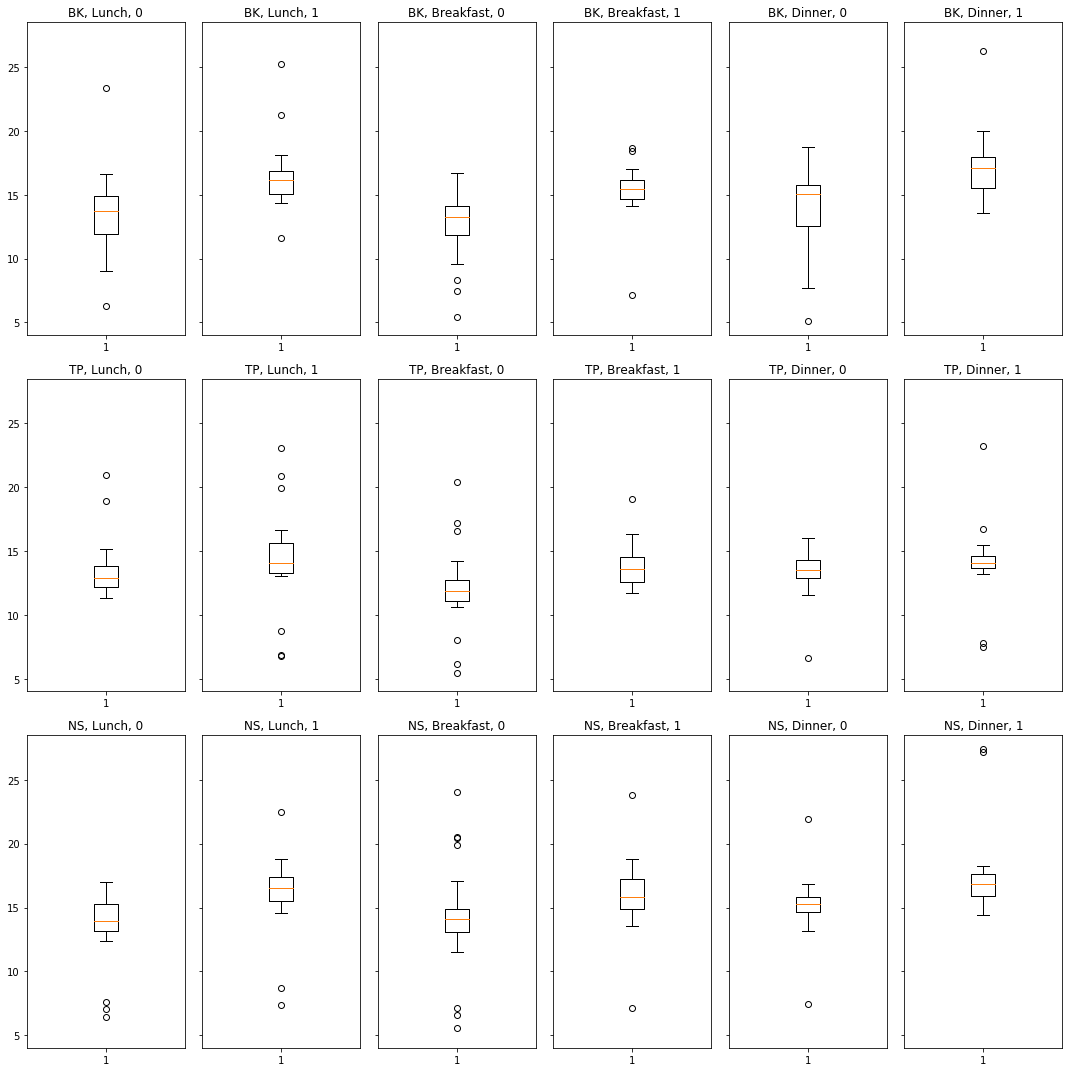

In [19]:
#Using box plot to find out the outliers in the data (delivery fare)
figure, axes = plt.subplots(nrows=3, ncols=6,figsize=(15,15),tight_layout=True,sharey=True)
i=0
for br in branch:
    j=0
    for order in order_type:
        for wk in weekday:
            subset = outlier_data[(outlier_data['branch_code']==br)&(outlier_data['order_type']==order)&(outlier_data['Weekday']==wk)]
            axes[i][j].boxplot(subset['new_delivery_fee'])
            axes[i][j].set_title(str(br)+', '+str(order) +', '+ str(wk))
            j+=1
    i+=1
# box plot for the actual value.
plt.show()


#### Employing the 2sigma rule to remove the outliers
<p> Here the split of Branches, weekday and Order Type are considered for outlier removal </p>

In [20]:
from numpy import mean
from numpy import std

outlier_removed = pd.DataFrame()
for br in branch:
    for order in order_type:
        for wk in weekday:
            #subsetting data for eliminating the outlier
            subset = outlier_data[(outlier_data['branch_code']==br)&(outlier_data['order_type']==order)&(outlier_data['Weekday']==wk)]
            #mean value for all new_delivery fee column
            mean = subset['new_delivery_fee'].mean()
            stdv = subset['new_delivery_fee'].std()

            #2Sigma approach
            limit = stdv * 2
            lower_limit, upper_limit = mean - limit, mean + limit

            #Extracting the outliers
            for index, row in subset.iterrows():
                if row['new_delivery_fee'] < lower_limit or row['new_delivery_fee'] > upper_limit:
                    #dropping the values less than lower limit and greater than the higher limit
                    subset = subset.drop(index=index)
            outlier_removed = outlier_removed.append(subset)


In [21]:
#values after removal of the outliers.
outlier_removed.shape

(464, 14)

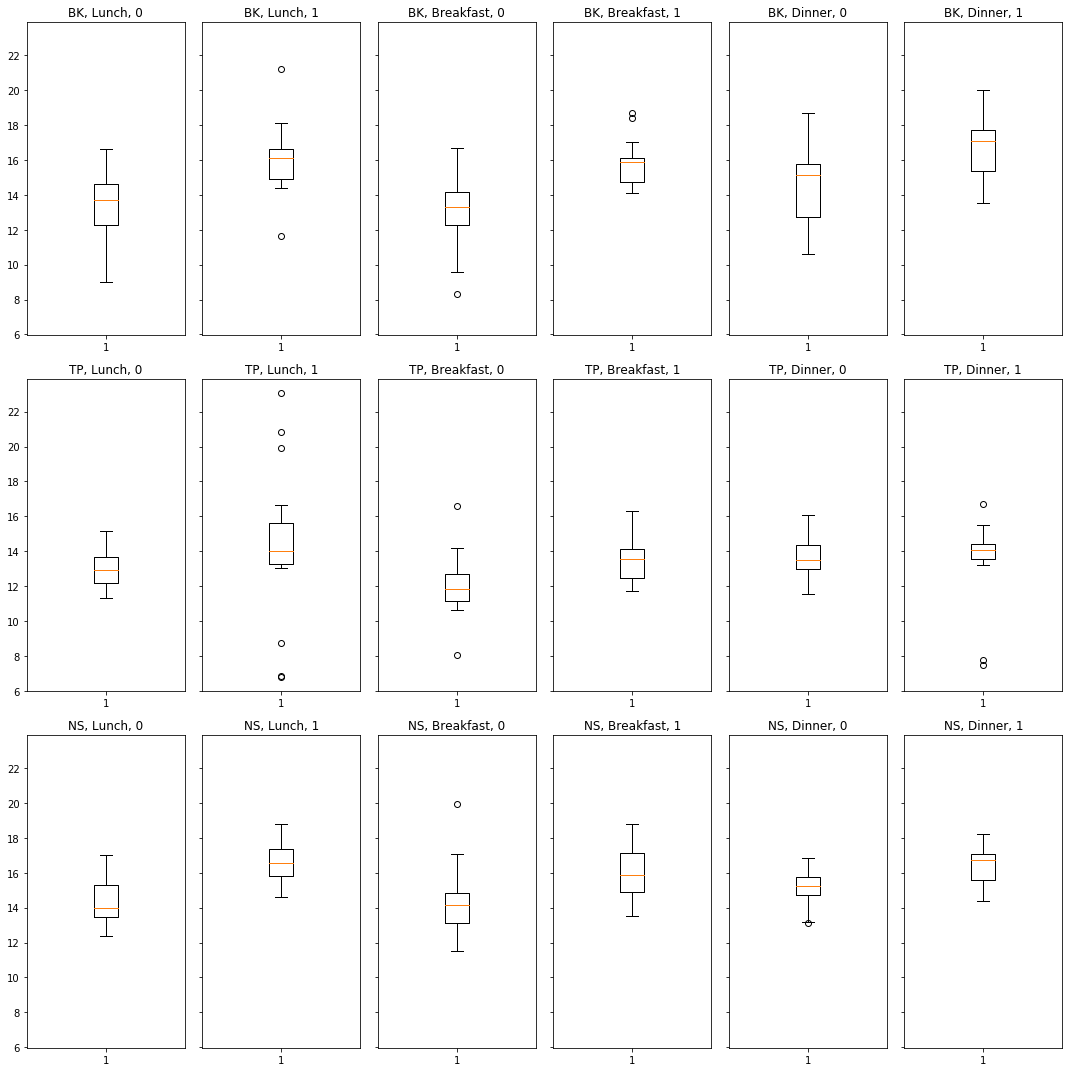

In [22]:
#plot for the new values after removing the outlier.
figure, axes = plt.subplots(nrows=3, ncols=6,figsize=(15,15),tight_layout=True,sharey=True)
i=0
for br in branch:
    j=0
    for order in order_type:
        for wk in weekday:
            subset = outlier_removed[(outlier_removed['branch_code']==br)&(outlier_removed['order_type']==order)&(outlier_removed['Weekday']==wk)]
            axes[i][j].boxplot(subset['new_delivery_fee'])
            axes[i][j].set_title(str(br)+', '+str(order) +', '+ str(wk))
            j+=1
    i+=1
plt.show()

#### writing the outlier removed data to the csv file

In [23]:
# output file after removing the outlier points in the dataframe.
outlier_removed = outlier_removed.sort_index().drop(columns=['Weekday','new_delivery_fee'])
outlier_removed.to_csv('Group025_outlier_data_solution.csv',index=False)

### 4.Analysis of Dirty_data

- Before performing the analysis in the dirty data, it is necessary find some data by processing the outlier data<br>


### Identifying the necessary data from the outlier data file

#### Finding out the list of items for BF, Lunch and Dinner

In [24]:
#Getting the list of all the items served for BF, Lunch and dinner
bf_items = []
lunch_items = []
dinner_items = []

#iterating for all rows in the dataframe
for index, row in outlier_data.iterrows():
    #extracting the items under breakfast
    if row['order_type'] == 'Breakfast':
        bf_items.append(re.findall('\'.*?\'',row['order_items'],flags=16))
    #extracting the items under lunch
    elif row['order_type'] == 'Lunch':
        lunch_items.append(re.findall('\'.*?\'',row['order_items'],flags=16))
    #extracting the items under dinner
    elif row['order_type'] == 'Dinner':
        dinner_items.append(re.findall('\'.*?\'',row['order_items'],flags=16))

#making alists of lists into a single list
bf_items = [item for bflist in bf_items for item in bflist ]
lunch_items = [item for llist in lunch_items for item in llist ]
dinner_items = [item for dlist in dinner_items for item in dlist ]

#Set is used to print only the unique values.
print('Breakfast','\n',set(bf_items))

print('Lunch','\n',set(lunch_items))

print('Dinner','\n',set(dinner_items))


Breakfast 
 {"'Cereal'", "'Eggs'", "'Pancake'", "'Coffee'"}
Lunch 
 {"'Fries'", "'Steak'", "'Burger'", "'Salad'", "'Chicken'"}
Dinner 
 {"'Shrimp'", "'Pasta'", "'Fish&Chips'", "'Salmon'"}


#### Finding out the price for each item in BF, Lunch and Dinner

- **we define a function for extracting the individual item cost**
- the function is called individually for breakfast, lunch and dinner.

In [25]:
#defining a function to form system of equations and calculating the price of each item
def item_price(order_type,tot_items):    
    counts = []
    item = []
    price =[]

    ind=0
    
    # extracting the equation for order type with as many unknowns
    for index, row in outlier_data.iterrows():
        if row['order_type'] == order_type:
            if len(re.findall('\'.*?\'',row['order_items'],flags=16))==tot_items:
                item.append(re.findall('\'.*?\'',row['order_items'],flags=16))
                counts.append(re.findall('\d+',row['order_items'],flags=16))
                price.append(row['order_price'])
                if len(counts)==tot_items:
                    break;
    
    #Analysis of the unknowns and its variable in the required order for solving using quadratic equation
    all_items = []
    list_ind=0
    items_count = []
    for item in item:
        cnt = counts[list_ind]
        new_list = list(sorted(zip(item,cnt)))
        val = []
        
        for entry in new_list:
            val.append(int(entry[1]))
        
        items_count.append(val)
        list_ind+=1
        
    for entry in new_list:
            all_items.append(entry[0])
    
    #Using Linear Equations to find solve for the prices        
    x = np.array(items_count)
    y = np.array(price)

    sol = np.linalg.solve(x,y)
    sol = [round(x,2) for x in list(sol)]
    return (dict(sorted(zip(all_items,sol))))


In [26]:
#user defined function is called for breakfast, lunch and dinner.
BF_Items = item_price('Breakfast',4)
Lunch_Items = item_price('Lunch',5)
Dinner_items = item_price('Dinner',4)
#Price of individual items are calculated
print(BF_Items)
print(Lunch_Items)
print(Dinner_items)

{"'Cereal'": 21.0, "'Coffee'": 7.5, "'Eggs'": 22.0, "'Pancake'": 24.25}
{"'Burger'": 31.0, "'Chicken'": 32.0, "'Fries'": 12.0, "'Salad'": 17.2, "'Steak'": 45.0}
{"'Fish&Chips'": 35.0, "'Pasta'": 27.5, "'Salmon'": 41.0, "'Shrimp'": 54.0}


### DATA ANAMOLIES


In [27]:
#dirty data file is read to dataframe
dirty_data = pd.read_csv('Group025_dirty_data.csv')
dirty_data.head()

order_id        date      time order_type branch_code  \
0  ORDK01356  2018-08-02  15:05:54      Lunch          BK   
1  ORDJ09691  2018-01-11  08:20:16  Breakfast          TP   
2  ORDA06214  2018-09-27  16:57:27     Dinner          BK   
3  ORDY02551  2018-29-12  20:00:00     Dinner          TP   
4  ORDY06568  2018-10-22  17:48:10     Dinner          TP   

                                         order_items  order_price  \
0                       [('Salad', 8), ('Steak', 1)]       182.60   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...       433.75   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...       623.50   
3                  [('Pasta', 4), ('Fish&Chips', 7)]       355.00   
4                      [('Salmon', 3), ('Pasta', 9)]       370.50   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.811730    144.970304                    0                    7.065   
1    -37.816403    144.983957                    1                    8.511   
2    -37.815415    144.995786                    0                    4.902   
3    -37.809499    144.957498                    0                    8.917   
4    -37.820734    144.966925                    0                    7.557   

   delivery_fee  
0     12.792277  
1      6.019342  
2     11.697970  
3     14.403017  
4     11.917831

#### Looking at the structure of Dirty Data

In [28]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


### Error or Anamolies in each coloumn is analysed

#### 4.1.Order ID

In [29]:
#unique items in Order ID is listed
len(dirty_data['order_id'].unique())
#no error is identified in the Order ID.

500

#### 4.2.Data
- for Data, the format is checked and changed to the single format.
- The date is check with respect to month(febraury - maximum 29, january - 31, April - 30, etc..)
- It is identified that, **no data error is found**.
- **Format was different in some entries** and that is corrected to single format.

In [30]:
## Checking the date column for anomalies
date_new=[]
for index, row in dirty_data.iterrows():
    
    datesplit = str(row['date']).split('-')
    
    date_split = [int(x) for x in datesplit]
    #code for date check according to month
    if date_split[0] <= 2019 and (date_split[1]>=1 and date_split[1]<=12):
        if date_split[1] in [1,3,5,7,8,10,12] and (date_split[2]>=1 and date_split[2]<=31):
            date_new.append(datetime.strptime(row['date'],"%Y-%m-%d"))
        elif date_split[1] in [4,6,9,11] and (date_split[2]>=1 and date_split[2]<=30):
            date_new.append(datetime.strptime(row['date'],"%Y-%m-%d"))
        elif date_split[1] == 2 and (date_split[2]>=1 and date_split[2]<=29):
            date_new.append(datetime.strptime(row['date'],"%Y-%m-%d"))
        else:
            if len(str(date_split[2]))==4:
                date_new.append(datetime.strptime(row['date'],"%d-%m-%Y"))
                
    #code for different formatted data
    else:
        if len(str(date_split[0]))==4:
            date_new.append(datetime.strptime(row['date'],"%Y-%d-%m"))
        elif len(str(date_split[0]))==2:
            date_new.append(datetime.strptime(row['date'],"%d-%m-%Y"))
#new corrected value is added to the dataframe.
dirty_data['date_new'] = date_new
dirty_data.head()

order_id        date      time order_type branch_code  \
0  ORDK01356  2018-08-02  15:05:54      Lunch          BK   
1  ORDJ09691  2018-01-11  08:20:16  Breakfast          TP   
2  ORDA06214  2018-09-27  16:57:27     Dinner          BK   
3  ORDY02551  2018-29-12  20:00:00     Dinner          TP   
4  ORDY06568  2018-10-22  17:48:10     Dinner          TP   

                                         order_items  order_price  \
0                       [('Salad', 8), ('Steak', 1)]       182.60   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...       433.75   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...       623.50   
3                  [('Pasta', 4), ('Fish&Chips', 7)]       355.00   
4                      [('Salmon', 3), ('Pasta', 9)]       370.50   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.811730    144.970304                    0                    7.065   
1    -37.816403    144.983957                    1                    8.511   
2    -37.815415    144.995786                    0                    4.902   
3    -37.809499    144.957498                    0                    8.917   
4    -37.820734    144.966925                    0                    7.557   

   delivery_fee   date_new  
0     12.792277 2018-08-02  
1      6.019342 2018-01-11  
2     11.697970 2018-09-27  
3     14.403017 2018-12-29  
4     11.917831 2018-10-22

#### 4.3.Order Type
##### Mismatch for BF, lunch, dinner to see if they fall in the right time frame

In [31]:

#Identifying the anamolies in time and OrderType
incorrect_index = []
print('Row_ID  Order_time OrderType')
for index, row in dirty_data.iterrows():
    if (datetime.strptime(row['time'], "%H:%M:%S")>=datetime.strptime('08:00:00',"%H:%M:%S") and datetime.strptime(row['time'], "%H:%M:%S")<=datetime.strptime('12:00:00',"%H:%M:%S"))and row['order_type']=='Breakfast':
        None
    elif(datetime.strptime(row['time'], "%H:%M:%S")>=datetime.strptime('12:00:01',"%H:%M:%S") and datetime.strptime(row['time'], "%H:%M:%S")<=datetime.strptime('16:00:00',"%H:%M:%S"))and row['order_type']=='Lunch':
        None
    elif(datetime.strptime(row['time'], "%H:%M:%S")>=datetime.strptime('16:00:01',"%H:%M:%S") and datetime.strptime(row['time'], "%H:%M:%S")<=datetime.strptime('20:00:00',"%H:%M:%S"))and row['order_type']=='Dinner':
        None
    else:
        #displaying the entries that order type are not recorded as per the time limit
        print(index,"   " ,row['time'],"  ",row['order_type'])
        incorrect_index.append(index)

Row_ID  Order_time OrderType
23     12:23:39    Breakfast
24     14:45:38    Dinner
51     16:37:10    Breakfast
94     08:00:00    Lunch
104     13:14:21    Dinner
133     17:07:36    Breakfast
142     17:48:10    Lunch
146     11:53:14    Dinner
162     19:09:17    Breakfast
169     08:10:08    Dinner
174     14:05:04    Dinner
183     15:05:54    Dinner
216     20:00:00    Lunch
223     15:56:37    Dinner
238     18:08:27    Lunch
240     13:44:47    Dinner
242     19:09:17    Lunch
249     16:47:19    Breakfast
258     16:47:19    Lunch
259     12:43:56    Dinner
279     13:34:38    Breakfast
280     12:13:31    Dinner
284     13:04:13    Dinner
288     15:05:54    Breakfast
289     09:00:50    Lunch
316     12:23:39    Breakfast
327     10:42:15    Dinner
359     20:00:00    Breakfast
384     18:08:27    Breakfast
393     14:35:29    Breakfast
416     10:52:23    Dinner
423     20:00:00    Lunch
428     14:55:46    Dinner
442     12:13:31    Breakfast
447     13:14:21    Breakfast

#### Fixing Order Type based on their order time

In [32]:
#Replacing the data for each of the above wrong entries
new_order_type = []
for index, row in dirty_data.iterrows():
    #changing the values only for incorrect entries
    if index in incorrect_index:
        if (datetime.strptime(row['time'], "%H:%M:%S")>=datetime.strptime('08:00:00',"%H:%M:%S") and datetime.strptime(row['time'], "%H:%M:%S")<=datetime.strptime('12:00:00',"%H:%M:%S")):
            new_order_type.append('Breakfast')
        elif(datetime.strptime(row['time'], "%H:%M:%S")>=datetime.strptime('12:00:01',"%H:%M:%S") and datetime.strptime(row['time'], "%H:%M:%S")<=datetime.strptime('16:00:00',"%H:%M:%S")):
            new_order_type.append('Lunch')
        elif(datetime.strptime(row['time'], "%H:%M:%S")>=datetime.strptime('16:00:01',"%H:%M:%S") and datetime.strptime(row['time'], "%H:%M:%S")<=datetime.strptime('20:00:00',"%H:%M:%S")):
            new_order_type.append('Dinner')
    else:
        new_order_type.append(row['order_type'])
#entering the corrected order type according to time in data frame
dirty_data['new_order_type'] = new_order_type


#### 4.4.Order Item and Order Price

##### Removing items that do not fall in correct order Type and recalculating the price for each order

In [33]:
#Finding out the total prices for each order
#Finding out the mistakes in each order of BF, Lunch and Dinner

price_list=[]
final_items = []
items_list =[]

#iterating for all rows in the data frame
for index, row in dirty_data.iterrows():
    price=0
    #code for breakfast - order type
    if row['new_order_type'] == 'Breakfast':
        items = re.findall('\'.*?\'',row['order_items'],flags=16)
        counts = re.findall('\d+',row['order_items'],flags=16)
        for item in items:
            # checking for items on the row of the data frame in breakfast item list
            if item not in BF_Items.keys():
                # removing the item if not in the breakfast item list
                counts.remove(counts[items.index(item)])
                items.remove(item)                
            else:
                #price getting calculated from the actual price extracted from outlier data.
                price += int(counts[items.index(item)]) * BF_Items[item]
        final_items = list(zip(items,counts))
        
    #code for lunch - order type
    elif row['new_order_type'] == 'Lunch':
        items = re.findall('\'.*?\'',row['order_items'],flags=16)
        counts = re.findall('\d+',row['order_items'],flags=16)
        for item in items:
            # checking for items on the row of the data frame in lunch item list
            if item not in Lunch_Items.keys():
                # removing the item if not in the lunch item list
                counts.remove(counts[items.index(item)])
                items.remove(item)
            else:
                #price getting calculated from the actual price extracted from outlier data.
                price += int(counts[items.index(item)]) * Lunch_Items[item]
    
    #code for dinner - order type
    elif row['new_order_type'] == 'Dinner':
        items = re.findall('\'.*?\'',row['order_items'],flags=16)
        counts = re.findall('\d+',row['order_items'],flags=16)
        # checking for items on the row of the data frame in dinner item list
        for item in items:
             # removing the item if not in the dinner item list
            if item not in Dinner_items.keys():
                counts.remove(counts[items.index(item)])
                items.remove(item)
            else:                
                #price getting calculated from the actual price extracted from outlier data.
                price += int(counts[items.index(item)]) * Dinner_items[item]
                
    final_items = list(zip(items,counts))
    
    #list is created for the new items and the price for each row in the data frame
    items_list.append(final_items)
    price_list.append(price)
    


In [34]:
#new items list (with inappropriate items removed) and its price(actual price calculated) is added to the data frame
dirty_data['New_order_price'] = price_list
dirty_data['new_order_items'] = items_list

#### 4.5.Branch Code
- From the earlier analysis, if is found there are only three branches.
- When the unique values in branch code column is checked, we obtain 6 values.
- Apart from the three expected values , the other three values are the lower case of the branches.
- So, they are corrected by replacing to its upper case value.
- **Branch Code is changed based on the Unique identifier in the Order_ID**

In [35]:
#Checking the branch names for any anomalies
br_name = list(dirty_data['branch_code'].unique())
print(br_name)

['BK', 'TP', 'ns', 'NS', 'bk', 'tp']


In [36]:
#Replacing the names of the branches 
for nam in br_name:
    dirty_data['branch_code'] = dirty_data['branch_code'].replace(nam,nam.upper())
list(dirty_data['branch_code'].unique())
dirty_data.head()

order_id        date      time order_type branch_code  \
0  ORDK01356  2018-08-02  15:05:54      Lunch          BK   
1  ORDJ09691  2018-01-11  08:20:16  Breakfast          TP   
2  ORDA06214  2018-09-27  16:57:27     Dinner          BK   
3  ORDY02551  2018-29-12  20:00:00     Dinner          TP   
4  ORDY06568  2018-10-22  17:48:10     Dinner          TP   

                                         order_items  order_price  \
0                       [('Salad', 8), ('Steak', 1)]       182.60   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...       433.75   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...       623.50   
3                  [('Pasta', 4), ('Fish&Chips', 7)]       355.00   
4                      [('Salmon', 3), ('Pasta', 9)]       370.50   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.811730    144.970304                    0                    7.065   
1    -37.816403    144.983957                    1                    8.511   
2    -37.815415    144.995786                    0                    4.902   
3    -37.809499    144.957498                    0                    8.917   
4    -37.820734    144.966925                    0                    7.557   

   delivery_fee   date_new new_order_type  New_order_price  \
0     12.792277 2018-08-02          Lunch           182.60   
1      6.019342 2018-01-11      Breakfast           433.75   
2     11.697970 2018-09-27         Dinner           623.50   
3     14.403017 2018-12-29         Dinner           355.00   
4     11.917831 2018-10-22         Dinner           370.50   

                                     new_order_items  
0                       [('Salad', 8), ('Steak', 1)]  
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...  
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...  
3                  [('Pasta', 4), ('Fish&Chips', 7)]  
4                      [('Salmon', 3), ('Pasta', 9)]

In [37]:
# unique code in the Order ID obtained from the earlier analysis
print('The ORDER ID tags for Branch BK')
print(set(id_bk))
print('The ORDER ID tags for Branch TP')
print(set(id_tp))
print('The ORDER ID tags for Branch NS')
print(set(id_ns))

The ORDER ID tags for Branch BK
{'X', 'A', 'K'}
The ORDER ID tags for Branch TP
{'B', 'J', 'Y'}
The ORDER ID tags for Branch NS
{'Z', 'C', 'I'}


#### Comparing the order IDs and modifying the branch codes

In [38]:
br_code=[]
#iterating for all rows in the data frame
for index, row in dirty_data.iterrows():
    #verification for Branch BK
    if re.sub('\d*','',re.sub('ORD','',row['order_id'])) in set(id_bk) and row['branch_code']=='BK':
        br_code.append(row['branch_code'])
    elif re.sub('\d*','',re.sub('ORD','',row['order_id'])) in set(id_bk) and row['branch_code']!='BK':
        br_code.append('BK')
    
    #verification for Branch TP
    if re.sub('\d*','',re.sub('ORD','',row['order_id'])) in set(id_tp) and row['branch_code']=='TP':
        br_code.append(row['branch_code'])
    elif re.sub('\d*','',re.sub('ORD','',row['order_id'])) in set(id_tp) and row['branch_code']!='TP':
        br_code.append('TP')

    #verification for Branch NS
    if re.sub('\d*','',re.sub('ORD','',row['order_id'])) in set(id_ns) and row['branch_code']=='NS':
        br_code.append(row['branch_code'])
    elif re.sub('\d*','',re.sub('ORD','',row['order_id'])) in set(id_ns) and row['branch_code']!='NS':
        br_code.append('NS')

dirty_data['new_branch_code'] = br_code

#### 4.6.Customer Latitude, Customer Longitude 
- we need to merge the suporting datasets for correcting the customer latitude, customer longitude and distance to customer.
- after merging, it is found that, for the given lat and long position, customer node is not identified.
- corrections are performed for the lat and long changes.


In [39]:
#merging data frame and supporting datasets. 
new_df = pd.merge(dirty_data.drop(columns=['branch_code']),branch_data,how='left',left_on=['new_branch_code'],right_on=['branch_code'])
cust_node_added = pd.merge(new_df,nodes_data,how='left',left_on=['customer_lat','customer_lon'],right_on=['lat','lon'])
cust_node_added = cust_node_added.drop(columns=['lat','lon']).rename(columns={'node':'customer_node'})

branch_code_added = pd.merge(cust_node_added,nodes_data,how='left',left_on=['branch_lat','branch_lon'],right_on=['lat','lon'])
branch_code_added = branch_code_added.drop(columns=['lat','lon']).rename(columns={'node':'branch_node'})
branch_code_added.head()


order_id        date      time order_type  \
0  ORDK01356  2018-08-02  15:05:54      Lunch   
1  ORDJ09691  2018-01-11  08:20:16  Breakfast   
2  ORDA06214  2018-09-27  16:57:27     Dinner   
3  ORDY02551  2018-29-12  20:00:00     Dinner   
4  ORDY06568  2018-10-22  17:48:10     Dinner   

                                         order_items  order_price  \
0                       [('Salad', 8), ('Steak', 1)]       182.60   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...       433.75   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...       623.50   
3                  [('Pasta', 4), ('Fish&Chips', 7)]       355.00   
4                      [('Salmon', 3), ('Pasta', 9)]       370.50   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.811730    144.970304                    0                    7.065   
1    -37.816403    144.983957                    1                    8.511   
2    -37.815415    144.995786                    0                    4.902   
3    -37.809499    144.957498                    0                    8.917   
4    -37.820734    144.966925                    0                    7.557   

      ...       new_order_type New_order_price  \
0     ...                Lunch          182.60   
1     ...            Breakfast          433.75   
2     ...               Dinner          623.50   
3     ...               Dinner          355.00   
4     ...               Dinner          370.50   

                                     new_order_items  new_branch_code  \
0                       [('Salad', 8), ('Steak', 1)]               BK   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...               TP   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...               BK   
3                  [('Pasta', 4), ('Fish&Chips', 7)]               TP   
4                      [('Salmon', 3), ('Pasta', 9)]               TP   

  branch_code branch_name branch_lat  branch_lon  customer_node  branch_node  
0          BK      Bakers -37.815834  145.046450   2.470181e+08   1889485053  
1          TP    Thompson -37.861835  144.905716   1.449267e+09   1390575046  
2          BK      Bakers -37.815834  145.046450   3.560887e+08   1889485053  
3          TP    Thompson -37.861835  144.905716   3.191597e+08   1390575046  
4          TP    Thompson -37.861835  144.905716   6.643778e+08   1390575046  

[5 rows x 22 columns]

In [40]:
#checking for missing values in newly merged columns for correcting the lat and long of customer.
branch_code_added.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 22 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
date_new                   500 non-null datetime64[ns]
new_order_type             500 non-null object
New_order_price            500 non-null float64
new_order_items            500 non-null object
new_branch_code            500 non-null object
branch_code                500 non-null object
branch_name                500 non-null object
branch_lat                 500 non-n

### Investigating the Customer_node column for NaN
- It is found that, there are 41 null values in customer code for the given lat long values.

In [41]:
#printing the error valued lat long valued rows 
branch_code_added[branch_code_added['customer_node'].isnull()]

order_id        date      time order_type  \
48   ORDK09544  2018-07-04  14:05:04      Lunch   
86   ORDC06218  2018-09-13  16:27:02     Dinner   
130  ORDA03049  2018-05-17  12:23:39      Lunch   
132  ORDB06266  2018-04-10  11:12:40  Breakfast   
144  ORDB02457  2018-08-17  15:36:20      Lunch   
158  ORDZ09729  2018-06-09  13:14:21      Lunch   
172  ORDY05537  2018-04-08  11:12:40  Breakfast   
173  ORDY07632  2018-02-10  09:10:59  Breakfast   
188  ORDA03187  2018-06-19  13:34:38      Lunch   
189  ORDZ02241  2018-01-13  08:20:16  Breakfast   
220  ORDY09285  2018-03-13  10:21:58  Breakfast   
222  ORDB09646  2018-11-13  18:28:43     Dinner   
225  ORDI01824  2018-05-16  12:23:39      Lunch   
234  ORDX06387  2018-10-23  17:48:10     Dinner   
235  ORDX00597  2018-05-10  12:13:31      Lunch   
237  ORDJ02149  2018-10-18  17:38:01     Dinner   
252  ORDX02056  2018-11-09  18:18:35     Dinner   
261  ORDY04807  2018-03-18  10:32:06  Breakfast   
271  ORDY03822  2018-08-10  15:16:03      Lunch   
295  ORDY09984  2018-07-19  14:35:29      Lunch   
315  ORDA10532  2018-12-10  19:19:26     Dinner   
326  ORDJ07785  2018-05-06  12:03:22      Lunch   
333  ORDC00430  2018-12-12  19:29:34     Dinner   
338  ORDA04325  2018-05-19  12:33:48      Lunch   
350  ORDZ00362  2018-07-06  14:05:04      Lunch   
353  ORDZ02159  2018-11-14  18:28:43     Dinner   
373  ORDA00688  2018-02-25  09:41:24  Breakfast   
383  ORDX08277  2018-02-05  09:10:59  Breakfast   
398  ORDJ09320  2018-10-16  17:27:53     Dinner   
402  ORDK03677  2018-11-17  18:38:52     Dinner   
412  ORDB03422  2018-08-04  15:05:54      Lunch   
437  ORDA05108  2018-09-12  16:27:02     Dinner   
438  ORDZ00689  2018-01-10  08:10:08  Breakfast   
443  ORDK06600  2018-03-05  10:01:41  Breakfast   
446  ORDC01887  2018-02-23  09:41:24  Breakfast   
452  ORDC02954  2018-01-31  09:00:50  Breakfast   
454  ORDA02871  2018-11-17  18:38:52     Dinner   
466  ORDB07086  2018-07-30  14:55:46      Lunch   
469  ORDB05184  2018-03-26  10:42:15  Breakfast   
475  ORDJ03664  2018-12-14  19:29:34     Dinner   
482  ORDB01357  2018-01-05  08:00:00  Breakfast   

                                           order_items  order_price  \
48                      [('Steak', 6), ('Chicken', 5)]       430.00   
86                       [('Shrimp', 3), ('Pasta', 6)]       327.00   
130  [('Salad', 6), ('Chicken', 3), ('Burger', 2), ...       309.20   
132                   [('Pancake', 10), ('Coffee', 6)]       287.50   
144  [('Steak', 2), ('Salad', 2), ('Burger', 4), ('...       296.40   
158  [('Steak', 4), ('Chicken', 5), ('Burger', 4), ...       476.00   
172                   [('Pancake', 6), ('Cereal', 10)]       355.50   
173  [('Cereal', 9), ('Eggs', 8), ('Pancake', 5), (...       561.25   
188                       [('Salad', 9), ('Fries', 7)]       238.80   
189                   [('Pancake', 2), ('Cereal', 10)]       258.50   
220       [('Coffee', 5), ('Pancake', 3), ('Eggs', 9)]       308.25   
222       [('Pasta', 7), ('Shrimp', 1), ('Salmon', 5)]       451.50   
225  [('Chicken', 8), ('Fries', 8), ('Burger', 10),...       748.00   
234  [('Salmon', 6), ('Pasta', 9), ('Fish&Chips', 1...      1059.50   
235  [('Steak', 10), ('Burger', 2), ('Salad', 4), (...       592.80   
237  [('Fish&Chips', 10), ('Pasta', 10), ('Shrimp',...      1180.00   
252                 [('Fish&Chips', 1), ('Shrimp', 4)]       251.00   
261                      [('Pancake', 4), ('Eggs', 1)]       119.00   
271  [('Chicken', 3), ('Burger', 5), ('Steak', 4), ...       613.00   
295  [('Chicken', 9), ('Steak', 1), ('Salad', 3), (...       573.60   
315  [('Fish&Chips', 3), ('Salmon', 5), ('Pasta', 5...       879.50   
326                     [('Salad', 3), ('Chicken', 2)]       115.60   
333   [('Fish&Chips', 6), ('Pasta', 8), ('Shrimp', 4)]       646.00   
338     [('Chicken', 8), ('Burger', 5), ('Fries', 10)]       531.00   
350  [('Chicken', 6), ('Burger', 1), ('Steak', 7), ...       555.20   
353              

##### On investigating this column, errors were found in the Lat and Lon column, next step would be correcting those values

In [42]:
lat_list = []
lon_list = []

#Iterating for all rows in the dataframe
for index, row in branch_code_added.iterrows():
    #filtering only the custermer node null valued rows
    if str(row['customer_node']).lower()=='nan':
        # changing the positive latitue values to the negative (actual value)
        if row['customer_lat']>0 and re.match('3.*\.*',str(row['customer_lat']))!=None:
             # changing the positive latitue values to the negative (actual value)
            lat = -row['customer_lat']
            lon = row['customer_lon']
        elif row['customer_lat']>0 and re.match('3.*\.*',str(row['customer_lat']))==None:
            # interchanging the latidue and longitude
            lon = row['customer_lat']
            lat = row['customer_lon']
            
        if row['customer_lon']<0 and re.match('14.*\.*',str(row['customer_lon']))==None:
             # interchanging the latidue and longitude
            lat = row['customer_lon']
            lon= row['customer_lat']
        elif row['customer_lon']<0 and re.match('14.*\.*',str(row['customer_lon']))!=None:
            # changing the negative longitude values to the positive longitude (actual value)
            lon = -row['customer_lon']
            lat = row['customer_lat']
    else:
        lat = row['customer_lat']
        lon = row['customer_lon']
    lat_list.append(lat)
    lon_list.append(lon)
#adding the corrected longitude and latitude to the dataframe
branch_code_added['new_customer_lat'] = lat_list
branch_code_added['new_customer_lon'] = lon_list

In [43]:
# merging again for checking for the correctness of change in longitude and latitude.
branch_code_added = branch_code_added.drop(columns=['customer_node'])
cust_node_corrected = pd.merge(branch_code_added,nodes_data,how='left',left_on=['new_customer_lat','new_customer_lon'],right_on=['lat','lon'])
cust_node_corrected = cust_node_corrected.drop(columns=['lat','lon']).rename(columns={'node':'customer_node'})
# now we could get the customer node for all values, that implies all latitude and longitude are correct.
cust_node_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 24 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
date_new                   500 non-null datetime64[ns]
new_order_type             500 non-null object
New_order_price            500 non-null float64
new_order_items            500 non-null object
new_branch_code            500 non-null object
branch_code                500 non-null object
branch_name                500 non-null object
branch_lat                 500 non-n

#### 4.7 Calculating the distance column
- distance is calculated using dijkstras algorithm.

In [44]:
#distance is calculated using the dijkstra algorithm
distance_KM = []
gr = nx.Graph()

#data are formatted to calculate the distance.
edge_tuple = list(zip(edges_data['u'],edges_data['v'],edges_data['distance(m)']))

gr.add_nodes_from(nodes_data['node'])
gr.add_weighted_edges_from(edge_tuple)

#distance is calculated using the node and edge values
for i in range(0,cust_node_corrected.shape[0]):
    cus_node = cust_node_corrected['customer_node'][i]
    br_node = cust_node_corrected['branch_node'][i]
    distance_KM.append(nx.dijkstra_path_length(gr, cus_node,br_node,weight='weight')/1000)

#newly calculated distance is added to the dataframe
cust_node_corrected['new_distance'] = distance_KM
cust_node_corrected.head()

order_id        date      time order_type  \
0  ORDK01356  2018-08-02  15:05:54      Lunch   
1  ORDJ09691  2018-01-11  08:20:16  Breakfast   
2  ORDA06214  2018-09-27  16:57:27     Dinner   
3  ORDY02551  2018-29-12  20:00:00     Dinner   
4  ORDY06568  2018-10-22  17:48:10     Dinner   

                                         order_items  order_price  \
0                       [('Salad', 8), ('Steak', 1)]       182.60   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...       433.75   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...       623.50   
3                  [('Pasta', 4), ('Fish&Chips', 7)]       355.00   
4                      [('Salmon', 3), ('Pasta', 9)]       370.50   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.811730    144.970304                    0                    7.065   
1    -37.816403    144.983957                    1                    8.511   
2    -37.815415    144.995786                    0                    4.902   
3    -37.809499    144.957498                    0                    8.917   
4    -37.820734    144.966925                    0                    7.557   

       ...       new_branch_code branch_code branch_name  branch_lat  \
0      ...                    BK          BK      Bakers  -37.815834   
1      ...                    TP          TP    Thompson  -37.861835   
2      ...                    BK          BK      Bakers  -37.815834   
3      ...                    TP          TP    Thompson  -37.861835   
4      ...                    TP          TP    Thompson  -37.861835   

   branch_lon branch_node new_customer_lat new_customer_lon  customer_node  \
0  145.046450  1889485053       -37.811730       144.970304      247018061   
1  144.905716  1390575046       -37.816403       144.983957     1449266751   
2  145.046450  1889485053       -37.815415       144.995786      356088689   
3  144.905716  1390575046       -37.809499       144.957498      319159699   
4  144.905716  1390575046       -37.820734       144.966925      664377812   

   new_distance  
0         7.065  
1         9.255  
2         4.902  
3         8.917  
4         7.557  

[5 rows x 25 columns]

#### 4.8.Calculating the delivery fee 
#### Linear Model built based on the Missing data is used for predicting the values

In [45]:
#list for three independent values for the model
weekday=[]
time_list=[]
delivery_fee=[]

#iterated for all rows in the dataframe
for index, row in cust_node_corrected.iterrows():
    #weekday list for weekday or weekend
    if (datetime.weekday(row['date_new'])) >= 5 :
        weekday.append(1)
    else:
        weekday.append(0)
    
    #time_list for order_type
    if row['new_order_type']=='Breakfast':
        time_list.append(0)
    elif row['new_order_type']=='Lunch':
        time_list.append(1)
    else:
        time_list.append(2)
    
    #actual delivery fee is calculated by eliminating the customer loyalty dependency
    if row['customerHasloyalty?'] == 1:
        delivery_fee.append(row['delivery_fee']*2)
    else:
        delivery_fee.append(row['delivery_fee'])
        
#newsly created values are added as columns into the data frame
cust_node_corrected['Weekday'] = weekday
cust_node_corrected['time_day'] = time_list
cust_node_corrected['new_delivery_fee'] = delivery_fee


#### Predicting the delivery fee for all the Branches
- value is predicted individually for all three branches.
- Residual Value(difference between the actual delivery fee and predicted value) for all rows are identified.
- The Replacement of the actual delivery fee to the predicted value is done only when the residual value is considerably large.
- Here we use histogram for the residual values to identify the cut off numbers.


     Y_actual     Y_pred   residual
0   12.792277  12.905303  -0.113026
2   11.697970  11.734308  -0.036338
12  32.724517  16.649591  16.074925
13  12.617521  12.676284  -0.058763
16  10.762519  11.249040  -0.486521


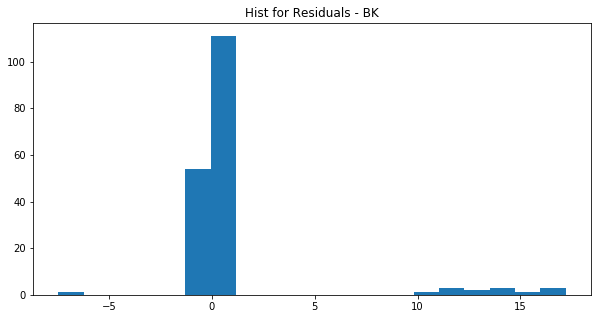

C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
##Branch BK
df_bk = pd.DataFrame()

#subsetting for branch data
cust_node_corrected_bk = cust_node_corrected[cust_node_corrected['new_branch_code']=='BK']

#train data
X = cust_node_corrected_bk[['Weekday','time_day','new_distance']]
Y = cust_node_corrected_bk['new_delivery_fee']

#predicted data
y_pred = lin_model_bk.predict(X)
df_bk['Y_actual'] = Y
df_bk['Y_pred']=y_pred
# difference between the actual distance mentioned and the distance calculated in identified in a new column
df_bk['residual'] = Y-y_pred

print(df_bk.head())

#Exploring the residual range for branch BK
plt.figure(figsize=(10,5))
plt.hist(df_bk['residual'],bins=20)
plt.title('Hist for Residuals - BK')
plt.show()

##Based on the above hist plot, for the residuals where we have values greater than 10 and less than -5, 
##we will replace the delivery fee with the predicted value

i=0
residual_list = list(df_bk['residual'])
pred = list(df_bk['Y_pred'])
updated_delivery_fee=[]

for index, row in cust_node_corrected_bk.iterrows():   
    if ((residual_list[i]>9) or (residual_list[i]<-5)):
        #predicted value is updated for larger difference (value is corrected)
        updated_delivery_fee.append(pred[i])
    else:
        #delivery fee is not updated for minor changes
        updated_delivery_fee.append(row['new_delivery_fee'])
    i+=1
#new column is added to the subset  
cust_node_corrected_bk['Updated_delivery_fee'] = updated_delivery_fee

     Y_actual     Y_pred  residual
5   16.944022  17.004116 -0.060094
6   13.186365  12.737003  0.449362
11  17.065886  17.445391 -0.379505
14  14.625470  14.626944 -0.001473
15  14.849235  14.909505 -0.060271


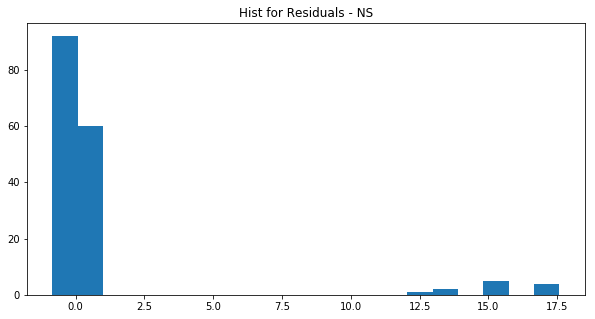

C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
##Branch BK
df_ns = pd.DataFrame()

#subsetting for the branch NS
cust_node_corrected_ns = cust_node_corrected[cust_node_corrected['new_branch_code']=='NS']

#test data
X = cust_node_corrected_ns[['Weekday','time_day','new_distance']]
Y = cust_node_corrected_ns['new_delivery_fee']

#predicted data
y_pred = lin_model_ns.predict(X)
df_ns['Y_actual'] = Y
df_ns['Y_pred']= y_pred
df_ns['residual'] = Y-y_pred

print(df_ns.head())

#Exploring the residual range for branch BK
plt.figure(figsize=(10,5))
plt.hist(df_ns['residual'],bins=20)
plt.title('Hist for Residuals - NS')
plt.show()

##Based on the above hist plot, for the residuals where we have values greater than 10, 
##we will replace the delivery fee with the predicted value

i=0
residual_list = list(df_ns['residual'])
pred = list(df_ns['Y_pred'])
updated_delivery_fee=[]

for index, row in cust_node_corrected_ns.iterrows():   
    if (residual_list[i]>10):
        #replacing for larger difference
        updated_delivery_fee.append(pred[i])
    else:
        #maintaining the actual value for the minor changes 
        updated_delivery_fee.append(row['new_delivery_fee'])
    i+=1

#new value is added as column in the subset dataframe
cust_node_corrected_ns['Updated_delivery_fee'] = updated_delivery_fee


    Y_actual     Y_pred  residual
1  12.038683  11.879312  0.159371
3  14.403017  14.639544 -0.236527
4  11.917831  11.955929 -0.038097
7  11.698902  12.105990 -0.407088
8  14.540872  14.767893 -0.227021


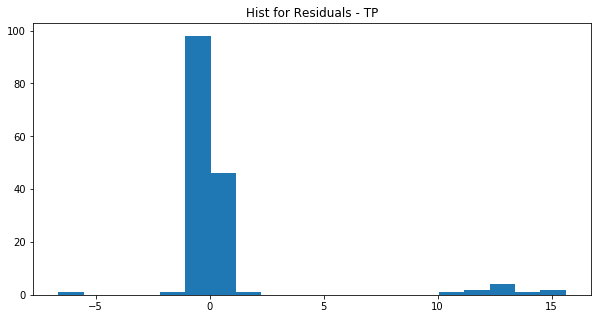

C:\Users\thiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
##Branch TP
df_tp = pd.DataFrame()

#subset for Branch TP
cust_node_corrected_tp = cust_node_corrected[cust_node_corrected['new_branch_code']=='TP']

#Test data
X = cust_node_corrected_tp[['Weekday','time_day','new_distance']]
Y = cust_node_corrected_tp['new_delivery_fee']

#Predicted Data
y_pred = lin_model_tp.predict(X)
df_tp['Y_actual'] = Y
df_tp['Y_pred']= y_pred
#difference from actual and predicted value is calculated
df_tp['residual'] = Y-y_pred

print(df_tp.head())

#Exploring the residual range for branch BK
plt.figure(figsize=(10,5))
plt.hist(df_tp['residual'],bins=20)
plt.title('Hist for Residuals - TP')
plt.show()

##Based on the above hist plot, for the residuals where we have values greater than 10 and less than -5, 
##we will replace the delivery fee with the predicted value

i=0
residual_list = list(df_tp['residual'])
pred = list(df_tp['Y_pred'])
updated_delivery_fee=[]

for index, row in cust_node_corrected_tp.iterrows():   
    if ((residual_list[i]>10) or (residual_list[i]<-5)):
        #replacing the larger difference
        updated_delivery_fee.append(pred[i])
    else:
        #maintaining the same value for minor differences
        updated_delivery_fee.append(row['new_delivery_fee'])
    i+=1
#new value estimated is added to the subset dataframe
cust_node_corrected_tp['Updated_delivery_fee'] = updated_delivery_fee

In [49]:
##Appending all three datasets together and calculating the Updated delivery fee
final_dirty_data = cust_node_corrected_bk.append(cust_node_corrected_ns).append(cust_node_corrected_tp)
final_dirty_data = final_dirty_data.sort_index()
delivery_fee_updated = []

#recalculating the delivery fee with customer loyalty
for index,row in final_dirty_data.iterrows():
    if row['customerHasloyalty?'] == 1:
        delivery_fee_updated.append(row['Updated_delivery_fee']/2)
    else:
        delivery_fee_updated.append(row['Updated_delivery_fee'])

        
final_dirty_data['delivery_fee_updated'] = delivery_fee_updated


#Removing Unwanted columns
final_dirty_data = final_dirty_data.drop(columns=['date','order_type','order_items','order_price','customer_lat','customer_lon','distance_to_customer_KM','delivery_fee','branch_code','branch_name','branch_lat','branch_lon','branch_node'\
                              ,'customer_node','Weekday','time_day','new_delivery_fee','Updated_delivery_fee'])


##Renaming the columns to original names
final_dirty_data = final_dirty_data.rename(columns={'date_new':'date','new_order_type':'order_type','New_order_price':'order_price','new_order_items':'order_items',\
                       'new_branch_code':'branch_code','new_customer_lat':'customer_lat','new_customer_lon':'customer_lon','new_distance':'distance_to_customer_KM',\
                                'delivery_fee_updated':'delivery_fee'})

##Rearranging the columns as per the input data
final_dirty_data = final_dirty_data[['order_id','date','time','order_type','branch_code','order_items','order_price','customer_lat','customer_lon','customerHasloyalty?','distance_to_customer_KM','delivery_fee']]

final_dirty_data.head()

order_id       date      time order_type branch_code  \
0  ORDK01356 2018-08-02  15:05:54      Lunch          BK   
1  ORDJ09691 2018-01-11  08:20:16  Breakfast          TP   
2  ORDA06214 2018-09-27  16:57:27     Dinner          BK   
3  ORDY02551 2018-12-29  20:00:00     Dinner          TP   
4  ORDY06568 2018-10-22  17:48:10     Dinner          TP   

                                         order_items  order_price  \
0                       [('Salad', 8), ('Steak', 1)]       182.60   
1  [('Eggs', 7), ('Pancake', 3), ('Cereal', 7), (...       433.75   
2  [('Shrimp', 5), ('Pasta', 5), ('Salmon', 1), (...       623.50   
3                  [('Pasta', 4), ('Fish&Chips', 7)]       355.00   
4                      [('Salmon', 3), ('Pasta', 9)]       370.50   

   customer_lat  customer_lon  customerHasloyalty?  distance_to_customer_KM  \
0    -37.811730    144.970304                    0                    7.065   
1    -37.816403    144.983957                    1                    9.255   
2    -37.815415    144.995786                    0                    4.902   
3    -37.809499    144.957498                    0                    8.917   
4    -37.820734    144.966925                    0                    7.557   

   delivery_fee  
0     12.792277  
1      6.019342  
2     11.697970  
3     14.403017  
4     11.917831

In [50]:
#writing to the required output file
final_dirty_data.to_csv('Group025_dirty_data_solution.csv',index=False)

### Inference 
- It is found that there are no issues in three columns 
    - **order ID**
    - **Time**
    - **Customer Loyaty**

### Reference
- https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
- https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
- https://stackoverflow.com/questions/49435438/pandas-validate-date-format